### About the dataset:
The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### Attributes:

    1. sex: male(0) or female(1);(Nominal)

    2. age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

    3. currentSmoker: whether or not the patient is a current smoker (Nominal)

    4. cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

    5. BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    6. prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    7. prevalentHyp: whether or not the patient was hypertensive (Nominal)

    8. diabetes: whether or not the patient had diabetes (Nominal)

    9. totChol: total cholesterol level (Continuous)

    10. sysBP: systolic blood pressure (Continuous)

    11. diaBP: diastolic blood pressure (Continuous)

    12. BMI: Body Mass Index (Continuous)

    13. heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    14. glucose: glucose level (Continuous)

    15. 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Target Variable


### Goal of the project:

The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk.

### Importing the libraries:

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option("max_rows",1000000)
pd.set_option("max_columns",100)


### Reading the data:

In [2]:
df = pd.read_csv('framingham.csv')
df = df.drop('education',axis =1)

In [3]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Exploratory Data Analysis:

In [4]:
print('Number of rows: ',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows:  4240
Number of columns: 15


In [5]:
print(df.dtypes)

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


Since all the attributes are in the numerical format, we do not have to perform any encoding on it.

In [6]:
duplicate_df = df[df.duplicated()]
duplicate_df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


There is no duplicate rows present in the data set.

In [7]:
miss_val = df.isnull().sum()/df.shape[0]*100 
miss_val[miss_val > 0]

cigsPerDay    0.683962
BPMeds        1.250000
totChol       1.179245
BMI           0.448113
heartRate     0.023585
glucose       9.150943
dtype: float64

The percentage of missing data in each attribute is given above.

     Glucose has close to 9% of missing data.

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()/df.shape[0]*100 


male               0.0
age                0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

We have dropped all Na values since glucose has over 9% of missing values which we cant treat.

We yet have a good amount of data to work with.

In [10]:
df.shape

(3751, 15)

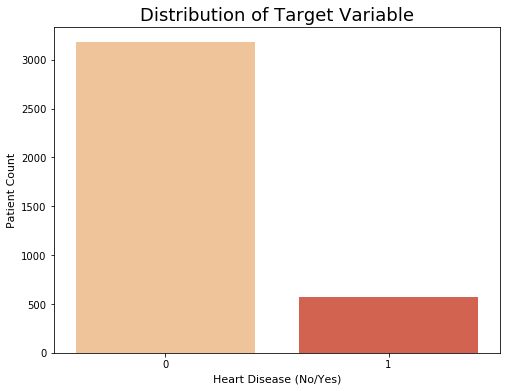

In [11]:
plt.figure(figsize= (8,6))
sns.countplot(df.TenYearCHD,palette='OrRd')
plt.title('Distribution of Target Variable',fontsize=18)
plt.xlabel('Heart Disease (No/Yes)',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)

plt.show()

We can see that its an imbalanced data set.

C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


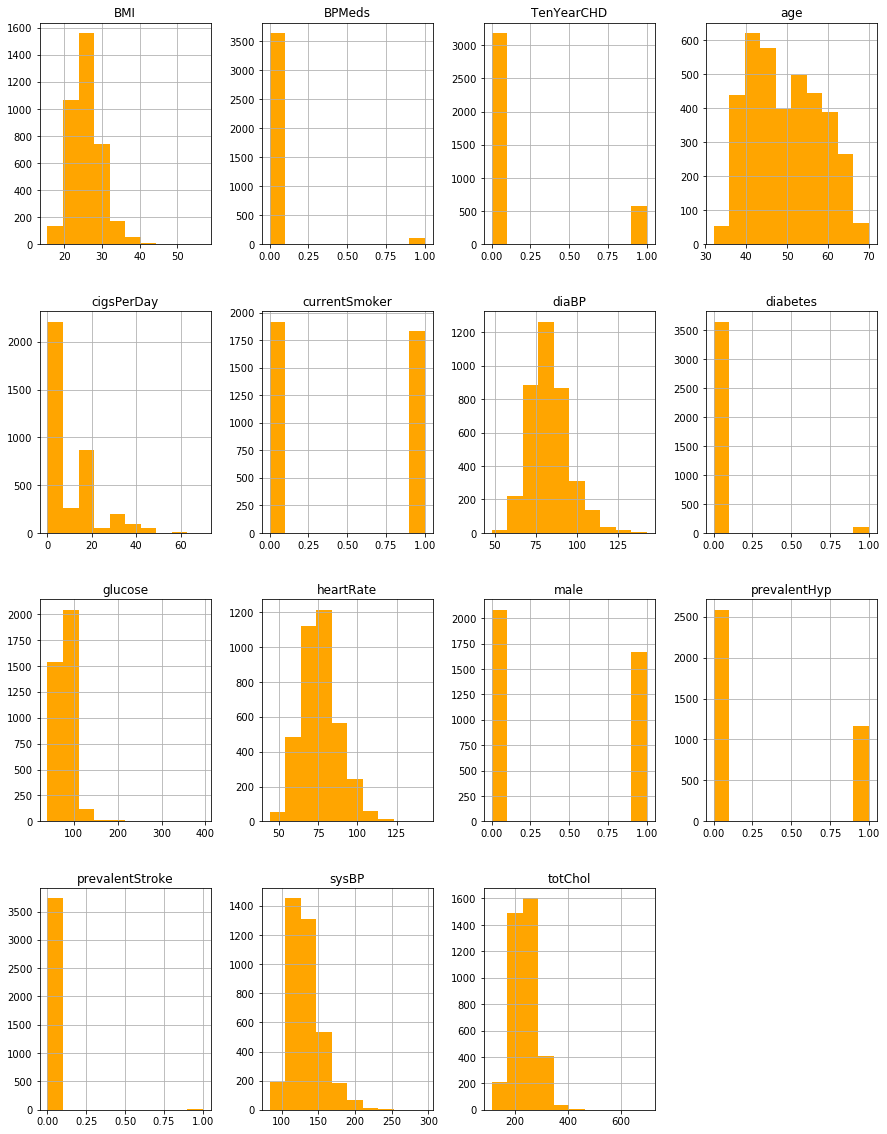

In [12]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax,color = 'Orange')
plt.show()

Having a look at how the data is distributed.

Inference:
    
    1. male to female ratio is quite equal.
    2. Very few people had diabetes.
    3. There is skewness present in almost all variables.
    4. People who had a stroke previously are almost negligible.
    5. Most people do not take BP medications.

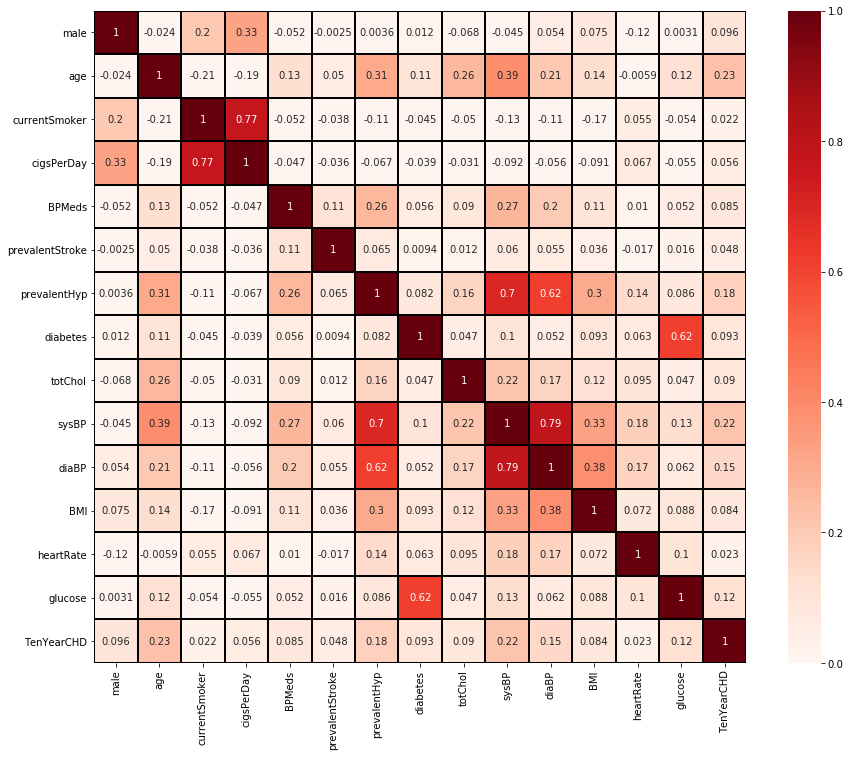

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False, vmin=0, vmax=1,cbar=True)
plt.show()

Random Forest handles feature selection as well so we apply any specific techniques.

This heatmap is for us to see how the variables are correalted.

In [14]:
num_cols = ['BMI','heartRate','sysBP','totChol','diaBP']

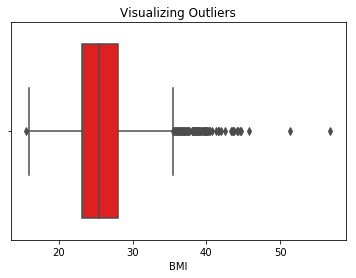

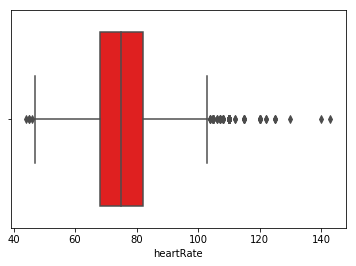

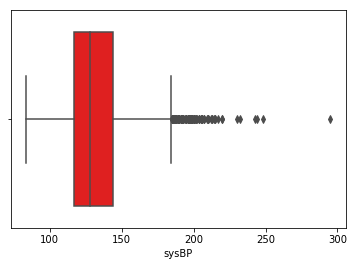

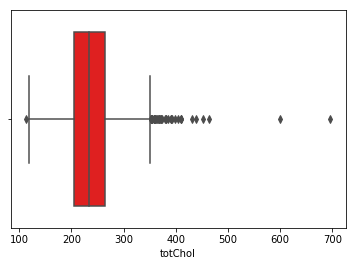

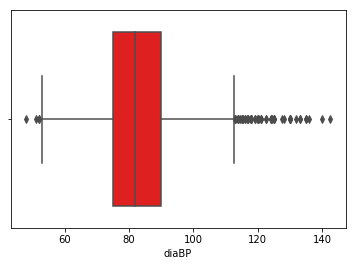

In [15]:
plt.title('Visualizing Outliers')
for i in num_cols:
    sns.boxplot(df[i],color='Red')
    plt.show()

We have a few outliers in the above attributes.

It would not be wise to drop them since not everyone can have the similar data.

More over, what if those data points play an important role in predicting the target variable.


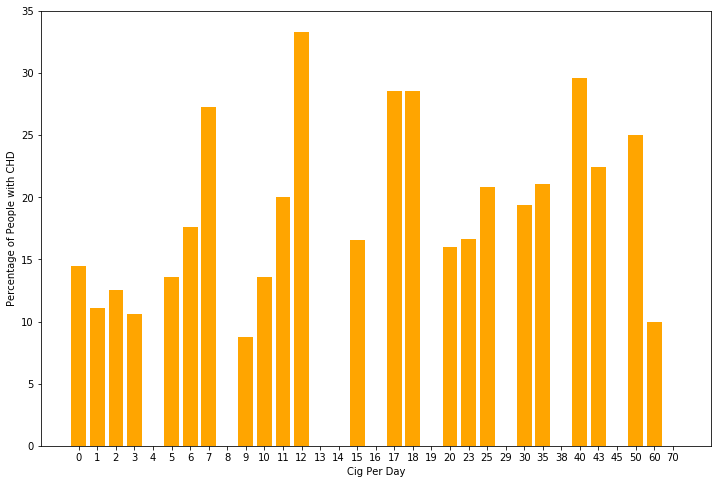

In [32]:
# cigsperday vs target
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
dist = df['cigsPerDay'].value_counts()
cigs = [int(x) for x in sorted(dist.index)] 
chdCount = dict(map(lambda x: [x,0],cigs))

for t,c in zip(df['TenYearCHD'],df['cigsPerDay']):
    chdCount[c] += t
rates = [(chdCount[c] / float(dist.loc[c]))*100 for c in cigs]

x = np.arange(len(cigs))


ax.bar(x,rates,color = 'Orange')
ax.set_xticks(x)
ax.set_xticklabels(cigs)
ax.set_xlabel('Cig Per Day')
ax.set_ylabel('Percentage of People with CHD')

plt.show()


We can see how bad is smoking cigerettes for the heart. Here we have plotted the percentage of people with CHD and how many cigs per day.

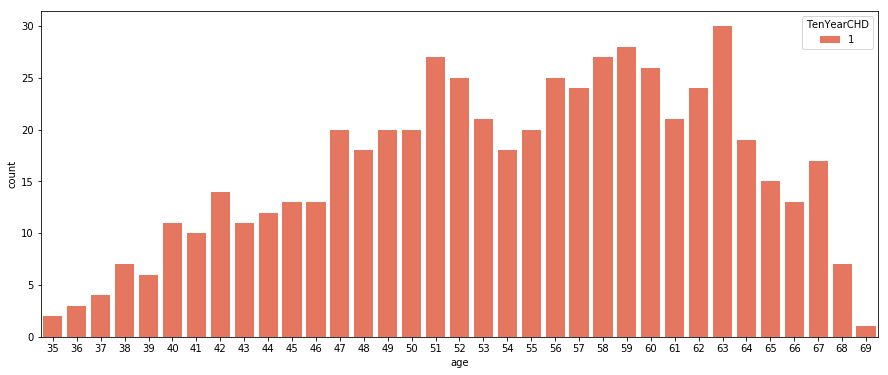

In [24]:
positive_cases = df[df['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='Reds')
plt.show()

We can see that the people with the highest risk of developing CHD are between the ages of 51 and 63.

The number of sick people generally increases with age.

### Train Test Split

In [35]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis = 1)

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Scaling the data

In [38]:
df_copy = df.copy()

In [39]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Model Creation

In [40]:
model = RandomForestClassifier(random_state=0)

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
y_pred = model.predict(X_test)

### Model Evaluation

In [44]:
print('Acurracy of train ',(model.score(X_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred)*100))

Acurracy of train  97.71428571428571
Acurracy of test  82.94849023090586


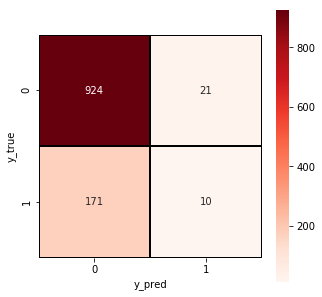

In [45]:
cm1 = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

We can see that the model is overfitting.

There are many missclassified data where the actual is that the person will have a CHD but the model has predicted that they wouldn't.

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       945
           1       0.32      0.06      0.09       181

   micro avg       0.83      0.83      0.83      1126
   macro avg       0.58      0.52      0.50      1126
weighted avg       0.76      0.83      0.78      1126



### Conclusion:
The model is clearly struggling to predict 1 i.e. prone to CHD.

This is due to the inbalance in the dataset.

We can imporve the model by doing the following:
    
    1. Balancing the target variable by performing undersampling or smote.
    2. Figuring out the best hyperparameters by performing a gridsearch.
    